# Рост певцов хора
В
1979 году было опрошено 235 членов нью-йоркской ассоциации хорового пения, для каждого из них известен рост и регистр голоса. Меняется ли средний рост вместе с регистром?



## Загрузим данные и посмотрим на них

In [49]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st
import pandas as pd
import seaborn as sns

In [50]:
import statsmodels.api as sm

In [51]:
data =  sm.datasets.get_rdataset("singer", "lattice").data
data.head()

,height,voice.part
0,64,Soprano 1
1,62,Soprano 1
2,66,Soprano 1
3,65,Soprano 1
4,60,Soprano 1


Переименуем 2 колонку и переведем рост в сантиметры

In [52]:
data.columns = ['height', 'voice']
data['height'] *= 2.54

In [53]:
data.head()

,height,voice
0,162.56,Soprano 1
1,157.48,Soprano 1
2,167.64,Soprano 1
3,165.10,Soprano 1
4,152.40,Soprano 1


In [54]:
data.describe()

,height
count,235.000000
mean,170.936596
std,9.714908
min,152.400000
25%,165.100000
50%,170.180000
75%,177.800000
max,193.040000


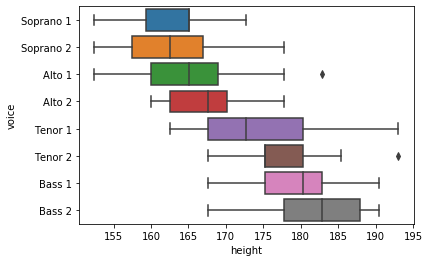

In [55]:
_ = sns.boxplot(x='height', y='voice', data=data)

## Однофакторный дисперсионный анализ:

In [56]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [57]:
lm = ols('height ~ C(voice)', data=data).fit()
table = sm.stats.anova_lm(lm)
table

,df,sum_sq,mean_sq,F,PR(>F)
C(voice),7.0,12911.303982,1844.471997,45.641891,5.617050e-40
Residual,227.0,9173.483695,40.411822,NaN,NaN


Ожидаемое p-value ~ `5.6e-40`

In [58]:
data.groupby('voice').mean()

,height
voice,
Alto 1,164.809714
Alto 2,167.734074
Bass 1,179.623590
Bass 2,181.316923
Soprano 1,163.195000
Soprano 2,162.475333
Tenor 1,175.018095
Tenor 2,177.558095


### Критерий Краскела-Уоллиса о равенстве средних:

In [59]:
st.kruskal(*data.groupby('voice').groups.values())

KruskalResult(statistic=229.8276956364947, pvalue=5.399740283982908e-46)

### Критерий Бартлетта о равенстве дисперсий:

In [60]:
st.bartlett(*data.groupby('voice').groups.values())

BartlettResult(statistic=18.417706445737398, pvalue=0.010221018996479406)

### HSD Тьюки:

Проверяем существенность различий между группами

In [61]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(data['height'], data['voice'])
result = mc.tukeyhsd()
 
print(result)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1    group2  meandiff p-adj   lower    upper   reject
------------------------------------------------------------
   Alto 1    Alto 2   2.9244 0.6065  -2.0572   7.9059  False
   Alto 1    Bass 1  14.8139  0.001  10.2856  19.3422   True
   Alto 1    Bass 2  16.5072  0.001  11.4718  21.5426   True
   Alto 1 Soprano 1  -1.6147    0.9  -6.2314    3.002  False
   Alto 1 Soprano 2  -2.3344 0.7959  -7.1733   2.5046  False
   Alto 1   Tenor 1  10.2084  0.001   4.8401  15.5767   True
   Alto 1   Tenor 2  12.7484  0.001   7.3801  18.1167   True
   Alto 2    Bass 1  11.8895  0.001   7.0205  16.7586   True
   Alto 2    Bass 2  13.5828  0.001    8.239  18.9267   True
   Alto 2 Soprano 1  -4.5391 0.0989  -9.4904   0.4123  False
   Alto 2 Soprano 2  -5.2587 0.0423 -10.4179  -0.0995   True
   Alto 2   Tenor 1    7.284 0.0027   1.6253  12.9427   True
   Alto 2   Tenor 2    9.824  0.001   4.1653  15.4827   True
   Bass 1    Bass 2   1.

## Итог:

- в целом, тип голоса существенно влияет на рост
- различия в этом влиянии присутствуют лишь между некоторыми парами голосов

**Cleveland W. S. (1993) Visualizing Data. Summit, New Jersey: Hobart Press.**